In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
gdp_df = pd.read_csv(r'C:\\Users\\J2das\\Documents\\NSS\\PYTHON\\Projects\\gdp-and-internet-usage-j2das1\\data\\gdp_percapita.csv', nrows=7663)

In [6]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [7]:
gdp_df.shape

(7662, 4)

Question 5: How many rows and columns are in `gdp_df`? What are the data types of each column? 7662 rows and 4 colums


**6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.**

In [10]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [11]:
print(gdp_df)

     Country or Area  Year        Value
0        Afghanistan  2021  1517.016266
1        Afghanistan  2020  1968.341002
2        Afghanistan  2019  2079.921861
3        Afghanistan  2018  2060.698973
4        Afghanistan  2017  2096.093111
...              ...   ...          ...
7657        Zimbabwe  1994  2670.106615
7658        Zimbabwe  1993  2458.783255
7659        Zimbabwe  1992  2468.278257
7660        Zimbabwe  1991  2781.787843
7661        Zimbabwe  1990  2704.757299

[7662 rows x 3 columns]


In [12]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [13]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


**7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?**

**7a. How many countries have data for all years?**

In [16]:
gdp_country = gdp_df.groupby('Country')

In [290]:
gdp_country.count()

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [18]:
total_count = gdp_country.count().sort_values(by = 'Year')

In [19]:
print(total_count)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
...                         ...             ...
Jamaica                      33              33
Japan                        33              33
Jordan                       33              33
IDA total                    33              33
Zimbabwe                     33              33

[242 rows x 2 columns]


In [20]:
all_years_count = total_count.loc[total_count.Year == 33]

In [33]:
all_years_count

,Year,GDP_Per_Capita
Country,,
Papua New Guinea,33,33
Pakistan,33,33
Australia,33,33
Pacific island small states,33,33
Austria,33,33
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [22]:
all_years_count.Year.value_counts()

Year
33    202
Name: count, dtype: int64

**7b.  Which countries are missing many years of data?**

In [295]:
total_count.head(20)

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
Cayman Islands,16,16
Nauru,19,19
Afghanistan,20,20
CuraÃ§ao,22,22


**7c. Look at the number of observations per year. What do you notice? when GDP_per_capita is low the country will be missing lots of years of data**


In [26]:
gdp_df.groupby(['Country']).agg({'Year' : ['count','mean','max','min'],'GDP_Per_Capita' :['count','mean','max','min']})

Year                     GDP_Per_Capita  \
                            count    mean   max   min          count   
Country                                                                
Afghanistan                    20  2011.5  2021  2002             20   
Africa Eastern and Southern    33  2006.0  2022  1990             33   
Africa Western and Central     33  2006.0  2022  1990             33   
Albania                        33  2006.0  2022  1990             33   
Algeria                        33  2006.0  2022  1990             33   
...                           ...     ...   ...   ...            ...   
Viet Nam                       33  2006.0  2022  1990             33   
West Bank and Gaza             29  2008.0  2022  1994             29   
World                          33  2006.0  2022  1990             33   
Zambia                         33  2006.0  2022  1990             33   
Zimbabwe                       33  2006.0  2022  1990             33   

                                                                      
                                     mean           max          min  
Country                                                               
Afghanistan                   1790.659581   2165.340915  1260.060581  
Africa Eastern and Southern   3238.934911   3661.360566  2715.131116  
Africa Western and Central    3337.603210   4148.547272  2561.665446  
Albania                       8674.425710  15501.662931  3264.820757  
Algeria                      10058.147899  11888.322967  7869.270272  
...                                   ...           ...          ...  
Viet Nam                      5710.759399  11396.531469  2099.394649  
West Bank and Gaza            5110.371012   6438.933640  3395.855028  
World                        12962.677329  17485.934316  9665.890260  
Zambia                        2674.800172   3425.948936  1991.185925  
Zimbabwe                      2301.826155   2931.725144  1353.207369  

[242 rows x 8 columns]

**8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?**

**8a. Create a histogram**

In [39]:
x = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [41]:
my_list = [2020]

In [43]:
gdp_2020 = x.loc[x.Year.isin(my_list)]


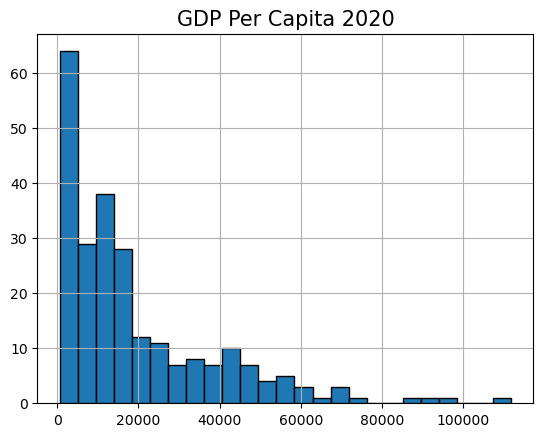

In [53]:
gdp_2020['GDP_Per_Capita'].hist(bins = 25,edgecolor = 'black');
plt.title('GDP Per Capita 2020', fontsize = 15);

**8b. Create a density plot**

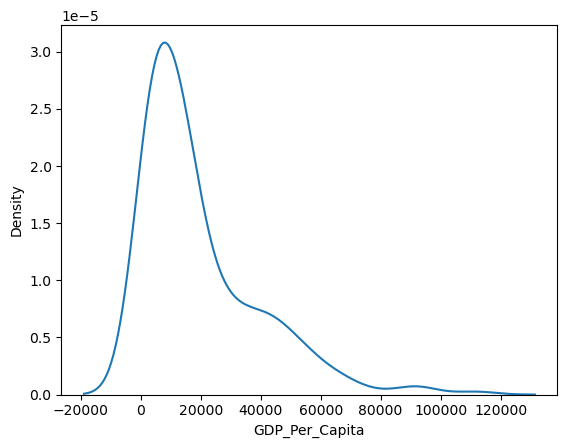

In [55]:
sns.kdeplot(data = gdp_2020, x = 'GDP_Per_Capita');

**8c. Create a boxplot**

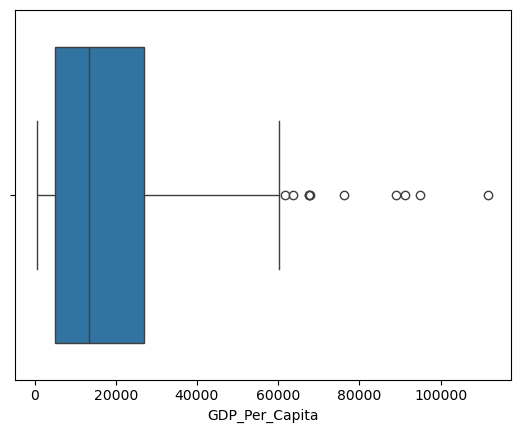

In [58]:
sns.boxplot(data = gdp_2020, x = 'GDP_Per_Capita');

**8d. Create a violin plot**

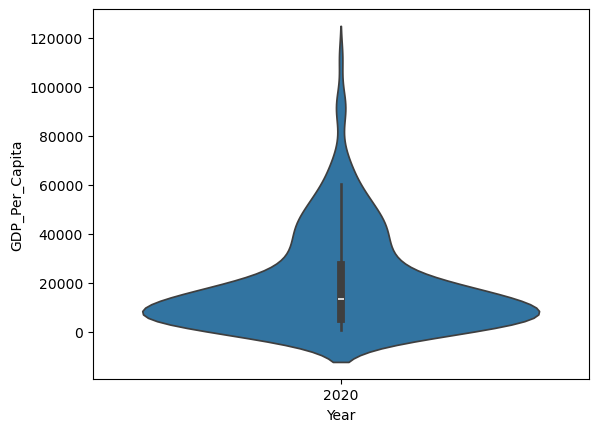

In [64]:
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita']);

**9. What was the median GDP per capita value in 2020? Answer: 13357.99**

In [304]:
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

**10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seab**orn)  

**10a. Create a boxplot**

In [76]:
x = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [78]:
x

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [130]:
my_list= [1990,2000,2010,2020]

In [309]:
gdp_decades = x.loc[x.Year.isin(my_list)]

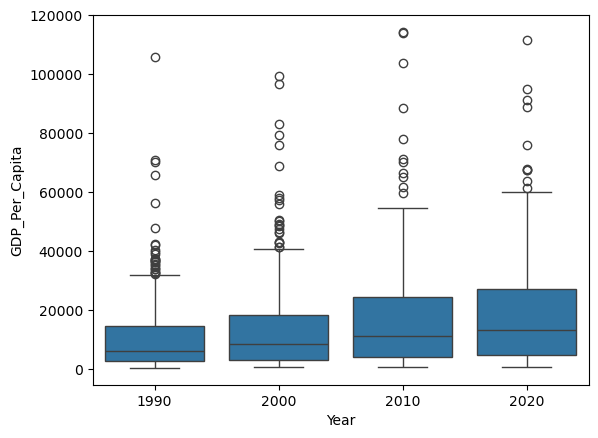

In [311]:
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita');

**10b. Create a barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)**

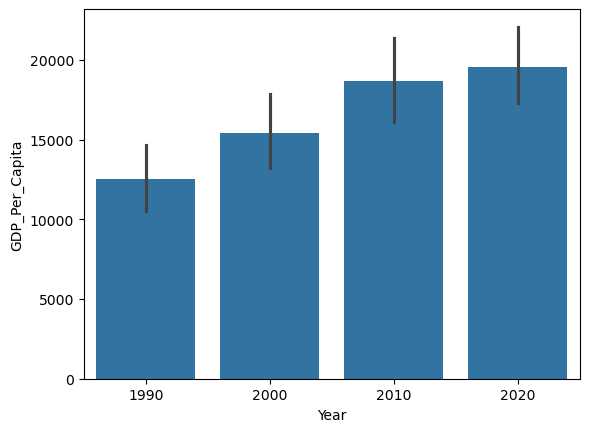

In [313]:
sns.barplot(x = "Year", y = "GDP_Per_Capita", data=gdp_decades);

**10c. Create a scatterplot**

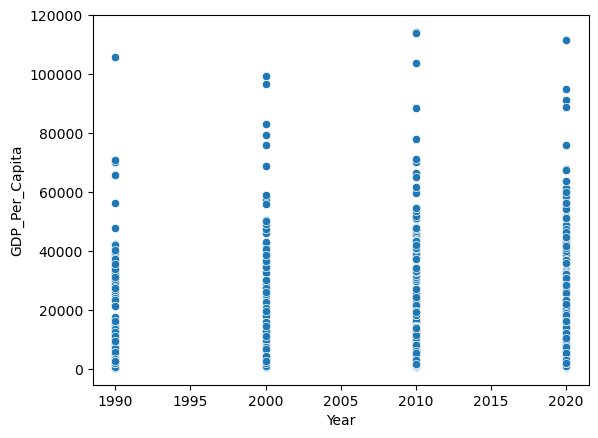

In [317]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"]);

In [319]:
Years = gdp_decades['Year']

In [321]:
GDP = gdp_decades['GDP_Per_Capita']

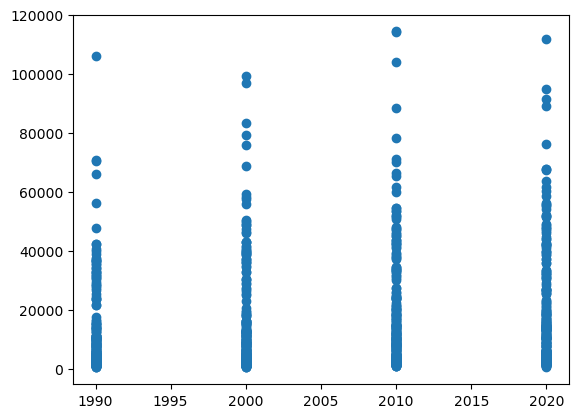

In [331]:
plt.scatter(Years, GDP);

**10d. Create a scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)**

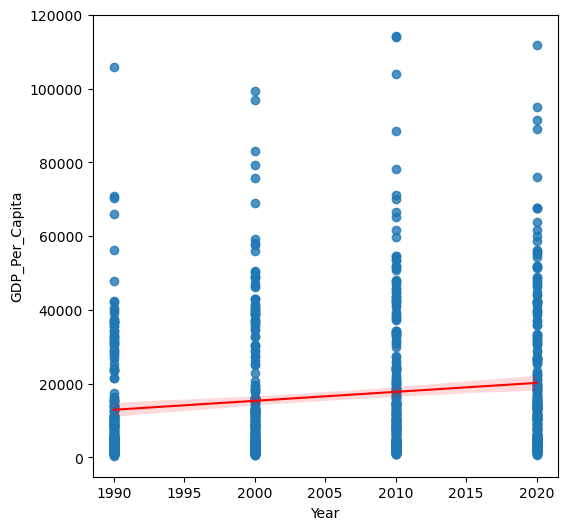

In [333]:
fig, ax = plt.subplots(figsize=(6,6))
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"],line_kws={"color" : "red", "linewidth": 1.5},ax=ax);

**Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.**

**10. Which country was the first to have a GDP per capita greater than $100,000?**

In [447]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [449]:
min_year = gdp_df.Year.min()

In [451]:
min_year

1990

In [453]:
m_year = gdp_df.loc[gdp_df['Year'] == 'min_year'] 

In [455]:
m_year

,Country,Year,GDP_Per_Capita
